### Error Transparent Gates Demo with QuTip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import qutip as qt
from vslq import vslq
import post_proc_tools as ppt
import datetime

### Definition of operators and Hamiltonians

In [8]:
# Primary and Shadow operators
## Number of levels in the primary transmons
Np = 3; Ns = 2;

# Energy scales in units of MHz -- us time scales
W = 70.0*np.pi; d = 700.0*np.pi;
Ohm =  1.75*np.pi;

# Create a new vslq instance
VSLQ = vslq(Ns, Np)

# Set and get the Hamiltonian
VSLQ.set_H(W, d, Ohm)
H = VSLQ.H

# Get the density matrix for a short simulation
## Set the dissipation rates
gammas = 10.; gammap = 5.; # 100 ns T1 shadow (Q = 100), 40 us T1 for primary

In [9]:
## Run the dynamics on a short time scale to test
tpts = np.linspace(0, 30, 1000)
psif = VSLQ.run_dynamics(tpts, gammap, gammas)

In [10]:
# Compute the expectation values
xL = VSLQ.get_logical_expect(psif)

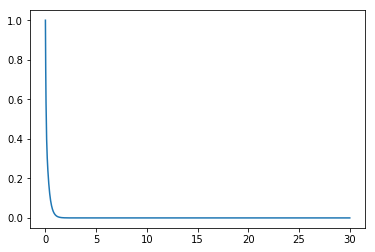

In [11]:
plt.plot(tpts, xL)

### Plot the Wigner Function, initial and final

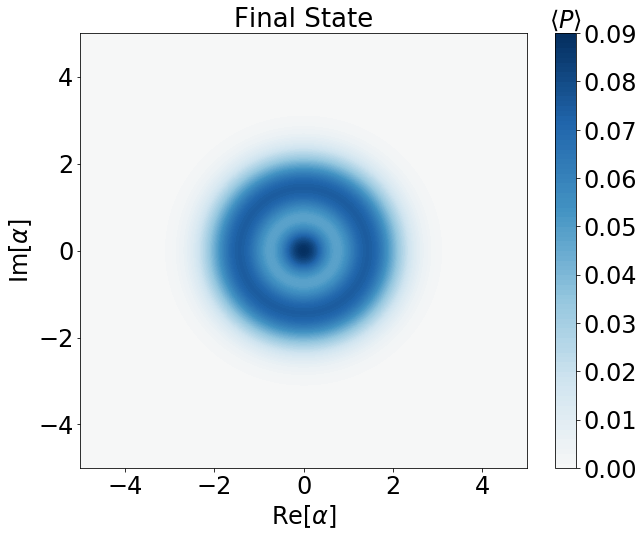

In [12]:
xvec, W = ppt.get_wigner(psif.states[-1])
ppt.plot_wigner(xvec, W, tstr='Final State', file_ext='final_state')

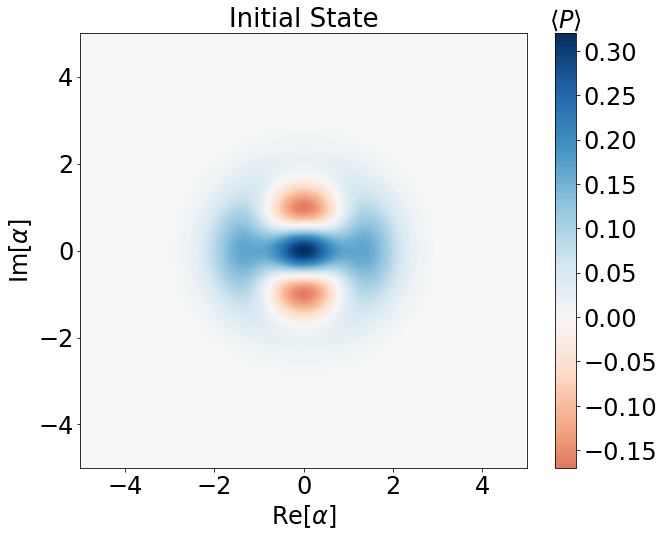

In [13]:
_, Wi = ppt.get_wigner(psif.states[0])
ppt.plot_wigner(xvec, Wi, tstr='Initial State', file_ext='init_state')